In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
hourly_data = pd.read_csv('data analysis book and projects/Bike-Sharing-Dataset/hour.csv')

In [5]:
print('shape:',hourly_data.shape)
print('number of null values:',hourly_data.isnull().sum().sum())

shape: (17379, 17)
number of null values: 0


In [6]:
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [8]:
preprocessed_data= hourly_data.copy()

In [9]:
season_mapping={1:'winter',2:'spring',3:'summer',4:'fall'}
yr_mapping = {0:2011,1:2012}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                   6: 'Saturday'}

preprocessed_data["season"] = preprocessed_data["season"].apply(lambda x:season_mapping[x])
preprocessed_data["yr"] = preprocessed_data["yr"].apply(lambda x : yr_mapping[x])
preprocessed_data["weekday"]= preprocessed_data["weekday"].apply(lambda x : weekday_mapping[x])

In [10]:
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit']\
                                  .apply(lambda x: \
                                  weather_mapping[x])

In [11]:
preprocessed_data["hum"] = preprocessed_data["hum"]*100
preprocessed_data["windspeed"] = preprocessed_data["windspeed"] *67

In [12]:
cols =['season', 'yr','weekday','weathersit','hum','windspeed']
preprocessed_data[cols].sample(10,random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


In [13]:
"""
assert that total number of rides is equal to the sum of registered and
casual ones
"""
assert( preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all()

/var/folders/nv/lp0mv0vs5sl3lmck9rdnnd5m0000gn/T/ipykernel_4222/2140706211.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data["registered"],label="registered")
/var/folders/nv/lp0mv0vs5sl3lmck9rdnnd5m0000gn/T/ipykernel_4222/2140706211.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

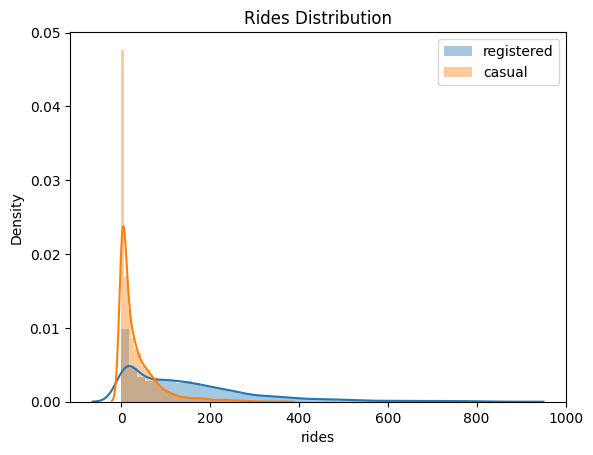

In [14]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data["registered"],label="registered")
sns.distplot(preprocessed_data["casual"],label="casual")
plt.legend()
plt.xlabel("rides")
plt.title("Rides Distribution")
plt.savefig('figs/rides_distribution.png',format='png')

Text(0, 0.5, 'no of rides per day')

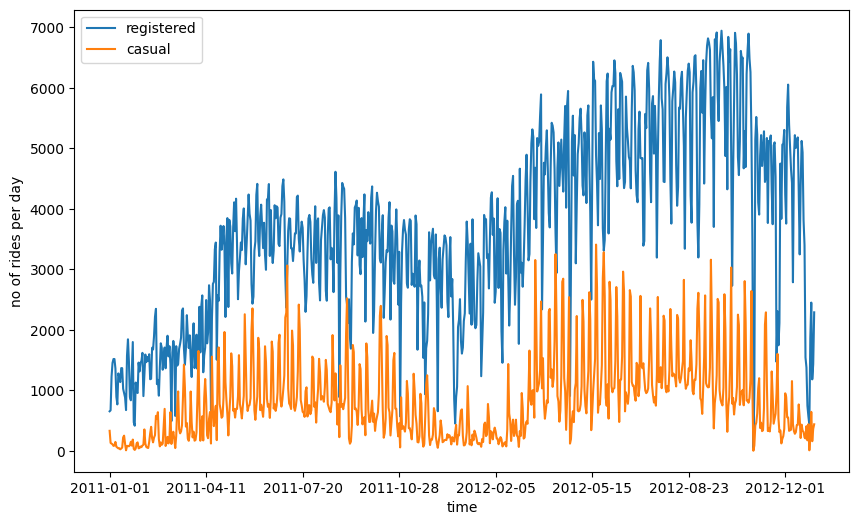

In [15]:
# plot evolution of rides over time
plot_data=preprocessed_data[['registered','casual','dteday']]
ax=plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time")
ax.set_ylabel("no of rides per day")
plt.savefig('figs/rides_daily.png',format='png')

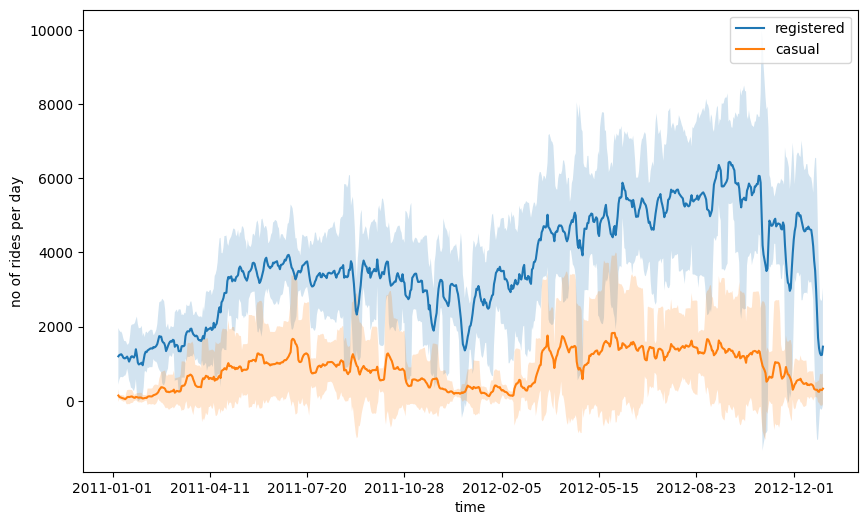

In [20]:
"""
Create new dataframe with necessary for plotting columns, and obtain
number of rides per day, by grouping over each day
"""
plot_data=preprocessed_data[['registered','casual','dteday']]
plot_data=plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window=7
rolling_means=plot_data.rolling(window).mean()
rolling_deviations=plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling
means, then we color the zone between the series of rolling means +- 2
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                +2*rolling_deviations['registered'],\
                rolling_means['registered']-2*rolling_deviations['registered'],\
                    alpha=0.2)
ax.fill_between(rolling_means.index,rolling_means['casual']+2*rolling_deviations['casual'],\
                rolling_means['casual']-2*rolling_deviations['casual'],alpha=0.2)
ax.set_xlabel("time")
ax.set_ylabel("no of rides per day")

plt.savefig("figs/rides_aggregated.png",format='png')

In [ ]:
plot_data=preprocessed_data[['hr','weekday','registered','casual']]
"""
transform the data into a format, in number of entries are computed as
count,
for each distinct hr, weekday and type (registered or casual)
"""
plot_data = plot_data.melt(id_vars=['hr','weekday'],\
                            var_name='type',value_name='count')
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""
grid = sns.FacetGrid(plot_data,row='weekday')
